In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("stephen_king_sales.csv")
df.head()


,Title,Year,Platform,Format,Units_Sold,Revenue_USD,Royalty_USD,Average_Price,Sales_Velocity,Season,Audience_Age_Group,Primary_Market,Customer_Acquisition_Cost,Average_Rating,Inventory_Produced,Inventory_Sold
0,It,2023,Amazon KDP,Ebook,320000,1276800,893760,3.99,Increasing,Autumn,25-44,US,0.85,4.6,0,0
1,It,2023,IngramSpark,Paperback,85000,1275000,637500,15.00,Stable,Autumn,35-54,US,1.20,4.6,100000,85000
2,It,2023,Audible,Audiobook,140000,1960000,784000,14.00,Increasing,Winter,30-49,US,1.50,4.7,0,0
3,The Shining,2023,Amazon KDP,Ebook,210000,837900,586530,3.99,Stable,Summer,25-44,US,0.75,4.5,0,0
4,The Shining,2023,IngramSpark,Hardcover,42000,1050000,525000,25.00,Decreasing,Summer,35-60,US,1.30,4.5,60000,42000


In [4]:
data = {
    "date": ["2024-01-15","2024-01-15","2024-01-15","2024-06-20","2024-10-10"],
    "book_title": ["It","It","The Shining","The Stand","Misery"],
    "platform": ["Amazon KDP","Amazon KDP","Barnes & Noble","Amazon KDP","IngramSpark"],
    "format": ["Ebook","Paperback","Hardcover","Audiobook","Paperback"],
    "units_sold": [12000,5200,3100,8700,2100],
    "gross_revenue_usd": [59988,72780,83700,130500,31500],
    "platform_fee_pct": [30,40,45,60,50],
    "sales_rank": [12,18,25,9,44],
    "page_views": [145000,82000,54000,160000,23000],
    "marketing_channel": ["Ads","Ads","Organic","Email","None"],
    "inventory_print": [0,20000,8000,0,6000],
    "units_sold_print": [0,5200,3100,0,2100],
    "avg_rating": [4.7,4.7,4.6,4.8,4.5],
    "review_count": [980000,980000,720000,1100000,510000],
    "region": ["US","US","US","US","UK"],
    "season": ["Winter","Winter","Winter","Summer","Fall"]
}

df = pd.DataFrame(data)
df


,date,book_title,platform,format,units_sold,gross_revenue_usd,platform_fee_pct,sales_rank,page_views,marketing_channel,inventory_print,units_sold_print,avg_rating,review_count,region,season
0,2024-01-15,It,Amazon KDP,Ebook,12000,59988,30,12,145000,Ads,0,0,4.7,980000,US,Winter
1,2024-01-15,It,Amazon KDP,Paperback,5200,72780,40,18,82000,Ads,20000,5200,4.7,980000,US,Winter
2,2024-01-15,The Shining,Barnes & Noble,Hardcover,3100,83700,45,25,54000,Organic,8000,3100,4.6,720000,US,Winter
3,2024-06-20,The Stand,Amazon KDP,Audiobook,8700,130500,60,9,160000,Email,0,0,4.8,1100000,US,Summer
4,2024-10-10,Misery,IngramSpark,Paperback,2100,31500,50,44,23000,None,6000,2100,4.5,510000,UK,Fall


In [5]:
# Calculate royalties
df["royalty_usd"] = df["gross_revenue_usd"] * (1 - df["platform_fee_pct"] / 100)

# Revenue per unit
df["revenue_per_unit"] = df["gross_revenue_usd"] / df["units_sold"]

df[[
    "book_title",
    "format",
    "units_sold",
    "gross_revenue_usd",
    "royalty_usd",
    "revenue_per_unit"
]]


,book_title,format,units_sold,gross_revenue_usd,royalty_usd,revenue_per_unit
0,It,Ebook,12000,59988,41991.6,4.999000
1,It,Paperback,5200,72780,43668.0,13.996154
2,The Shining,Hardcover,3100,83700,46035.0,27.000000
3,The Stand,Audiobook,8700,130500,52200.0,15.000000
4,Misery,Paperback,2100,31500,15750.0,15.000000


In [6]:
rank_analysis = df.sort_values("sales_rank")[[
    "book_title","platform","format","sales_rank","units_sold"
]]

rank_analysis


,book_title,platform,format,sales_rank,units_sold
3,The Stand,Amazon KDP,Audiobook,9,8700
0,It,Amazon KDP,Ebook,12,12000
1,It,Amazon KDP,Paperback,18,5200
2,The Shining,Barnes & Noble,Hardcover,25,3100
4,Misery,IngramSpark,Paperback,44,2100


In [7]:
seasonal_units = df.groupby("season")["units_sold"].sum()
seasonal_revenue = df.groupby("season")["gross_revenue_usd"].sum()

seasonal_units, seasonal_revenue


(season
 Fall       2100
 Summer     8700
 Winter    20300
 Name: units_sold, dtype: int64,
 season
 Fall       31500
 Summer    130500
 Winter    216468
 Name: gross_revenue_usd, dtype: int64)

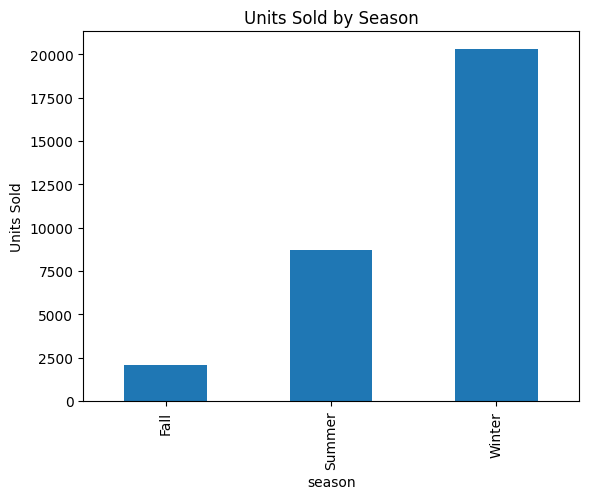

In [8]:
seasonal_units.plot(kind="bar", title="Units Sold by Season")
plt.ylabel("Units Sold")
plt.show()


In [9]:
df.groupby("book_title")[[
    "units_sold",
    "gross_revenue_usd",
    "avg_rating",
    "review_count"
]].sum().sort_values("units_sold", ascending=False)


,units_sold,gross_revenue_usd,avg_rating,review_count
book_title,,,,
It,17200,132768,9.4,1960000
The Stand,8700,130500,4.8,1100000
The Shining,3100,83700,4.6,720000
Misery,2100,31500,4.5,510000


In [10]:
platform_format = df.groupby(["platform","format"])[
    "units_sold"
].sum().reset_index()

platform_format


,platform,format,units_sold
0,Amazon KDP,Audiobook,8700
1,Amazon KDP,Ebook,12000
2,Amazon KDP,Paperback,5200
3,Barnes & Noble,Hardcover,3100
4,IngramSpark,Paperback,2100


In [11]:
df["sell_through_rate"] = np.where(
    df["inventory_print"] > 0,
    df["units_sold_print"] / df["inventory_print"],
    np.nan
)

df[[
    "book_title",
    "format",
    "inventory_print",
    "units_sold_print",
    "sell_through_rate"
]]


,book_title,format,inventory_print,units_sold_print,sell_through_rate
0,It,Ebook,0,0,NaN
1,It,Paperback,20000,5200,0.2600
2,The Shining,Hardcover,8000,3100,0.3875
3,The Stand,Audiobook,0,0,NaN
4,Misery,Paperback,6000,2100,0.3500


In [12]:
df["conversion_rate"] = df["units_sold"] / df["page_views"]

df.groupby("marketing_channel")[[
    "units_sold",
    "gross_revenue_usd",
    "conversion_rate"
]].mean().sort_values("units_sold", ascending=False)


,units_sold,gross_revenue_usd,conversion_rate
marketing_channel,,,
Email,8700.0,130500.0,0.054375
Ads,8600.0,66384.0,0.073087
Organic,3100.0,83700.0,0.057407
None,2100.0,31500.0,0.091304
